# Distance Based Method

There are lots of these methods. In my opinion they are all quote obtuse, that is they require some methods which almost feel like brute force.  

Some correlation needs to be found and from that some transformation can be derived. There are a few good correlation methods in scymy and numpy.  
https://stackoverflow.com/questions/24034839/valueerror-resizing-an-ndarray  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate2d.html  

Note on correlate2d:
> The output is the full **discrete linear cross-correlation** of the inputs. 

In [1]:
import imageio
import numpy as np
import scipy as sp

In [2]:
from PIL import Image

s = 256
newsize = (s,s)
temp1 = Image.open('../data/T1_segment_1.tif').resize(newsize)
temp2 = Image.open('../data/T1_segment_2.tif').resize(newsize)

im1 = np.array(temp1).astype('float64')
p = int(im1.shape[0])
im1 = np.pad(im1, ((p,p), (p,p)), 'constant', constant_values=(0,0))
im2 = np.array(temp2).astype('float64')

In [3]:
from scipy import signal
from scipy import misc

face = im1 - im1.mean()
template = im2
template -= im2.mean()
corr = signal.correlate2d(face, template, mode='same')
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match

In [4]:
import matplotlib.pyplot as plt
fig, (ax_orig, ax_template, ax_corr) = plt.subplots(3, 1,
                                                    figsize=(6, 15))
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(template, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()
ax_orig.plot(x, y, 'ro')

plt.show()

In [5]:
x,y

(537, 383)

merge the images given the x,y homography

In [6]:
from math import floor
from PIL import Image

def paste(canvas, paint):
    '''
    Paste an image on to another using masks.
    '''
    h, w = canvas.shape
    p_h, p_w = paint.shape
    nw, nh = (0,0)
    if w < p_w:
        nw = p_w - w
    if h < p_h:
        nh = p_h - h
    output = np.copy(canvas)
    output = np.pad(output, ((0, nh), (0, nw)), 'constant', constant_values=(0,0))
    assert output.shape[0] == paint.shape[0], 'different heights: %d %d'% (output.shape[0], paint.shape[0])
    assert output.shape[1] == paint.shape[1], 'different widths: %d %d' % (output.shape[1], paint.shape[1])
    # mask magic!
    o_mask = np.ma.equal(output, 0)
    output[o_mask] = paint[o_mask] # for places where output is 0: paint.
    return output

In [7]:
half_y = int(temp1.size[0] / 2)
half_x = int(temp1.size[1] / 2)

pad_top = 0
pad_bottom = 0
pad_left = 0
pad_right = 0

print('x,y,p,',x,y,p)
nx = x - int(p)
ny = y - int(p)

nx = abs(nx - half_x)
ny = abs(ny - half_y)

print(nx,ny, half_y, half_x, im1.shape)
    
temp4 = np.pad(np.asarray(temp2, dtype='uint16'), ((ny, 0), (nx, 0)), 'constant', constant_values=(0,0))
im3 = paste(np.asarray(temp1, dtype='uint16'), temp4)

x,y,p, 537 383 256
153 1 128 128 (768, 768)
0 0 0 0


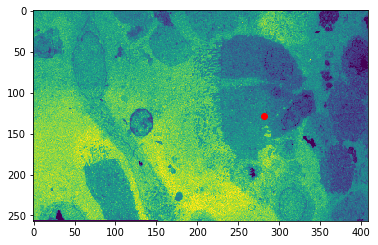

In [8]:
plt.imshow(im3)
axs = plt.gca()
axs.plot(nx+half_x, ny+half_y, 'ro')
plt.show()